# Alcoy Tourist

El objetivo de este proyecto es..... (averiguar cuántos turistas se encuentran en Alcoy en base a sus redes favoritas en sus teléfonos)

Este objetivo no es sencillo porque no todos los visitantes tienen activado el Wifi de su teléfono....

Para lograr este objetivo analizaremos.....

# Imports

In [1]:
import sweetviz as sv
import pandas as pd

# Data

## Paths definition

In [2]:
DATA_PATH = 'data'
REPORTS_PATH = 'reports/'

## Data loading

En este proyecto dispondremos de tres dataset:

- `datosEncuesta2206`: contiene la información relativa a las encuestas realizadas a las personas que han visitado la oficina de turismo de Alcoy.
- `datosSensorTurismo2206`: dispone de información ...
- `ssidsAlcoi`: se trata de ...

Nota: _En el conjunto de datos datos SSIDS Alcoi tenemos todas las direcciones de los puntos de conexión de la ciudad de Alocai._


In [3]:
quiz_df = pd.read_csv(f"{DATA_PATH}/datosEncuesta2206.csv")
sensor_df = pd.read_csv(f"{DATA_PATH}/datosSensorTurismo2206.csv")
ssids_df  = pd.read_csv(f"{DATA_PATH}/ssidsAlcoi.csv")

En el dataset datosSensorTurismo2206 tenemos 


De cada dispositivo, si la red a la que más se conecta no es de Alcoi es un turista.


De este criterio saldrá un listado de MAC (dispositivos) que visitantes.

## Data Analyisis

In [4]:
# quiz_report = sv.analyze(quiz_df)
# quiz_report.show_html(f"{REPORTS_PATH}/Quiz.html")

# sensor_report = sv.analyze(sensor_df)
# sensor_report.show_html(f"{REPORTS_PATH}/Sensors.html")

# ssids_report = sv.analyze(ssids_df)
# ssids_report.show_html(f"{REPORTS_PATH}/SSIDs.html")

A continuación listaremos todos los dispositivos que se han conectado a alguna de las redes conocidas en Alcoy, junto a la MAC del dispositivo se mostrará el número de veces que se ha conectado desde que se empezó a recoger esta información.

In [5]:
sorted_macs_ssid = sensor_df.groupby(by=["mac", 'ssid']).count().sort_values('date', ascending = False)
sorted_macs_ssid

,,date
mac,ssid,
d29675014f618f3ef3f6b75f146b4be71c513c16,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,12807
5cbcffeab5fa9206a8c2712ef085daab688dd086,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,1267
273a50bed34ca35e5d1987ea3b05ce765aae0e0e,917c1e46b3861300aebf9a14e47a6ec989c7ac9e,933
6ec65bc349733bc0e85d17294d3a9cb6d8b8bdc8,ffd2edd79fe4bac98610a2ad6892b53395e44e34,724
de6157c0185924febf402efa9e4c36a4cbe4cbb1,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,496
...,...,...
57502713dc0b287ab0e893c8313f55598077630f,7a592c4a3d20f50b2ba09a85b67c6d2fc925664b,1
5751a0c6507a8accd8a13005b6976d663db69bad,7a592c4a3d20f50b2ba09a85b67c6d2fc925664b,1
575588aec3617b91ea18facfd1e52a939b47dd6f,b67ede98966e4c418becb185d7efc74e2f59aa15,1


In [6]:
# sorted_mac_ssid.value_counts()
# sorted_mac_ssid
# ssids_df[ssids_df['ssid'] == 'cca78a1e963f3ba3443bf3e54a9aa939f73d223d']

Tal como se explica en la web **REFERENCIA DE ABAJO**, se considerarán turistas aquellas personas cuya red favorita en su teléfono no sea de una de Alcoy. Para esto se realizará un conteo del número de veces que cada dispositvo se ha conectado a alguna red, de esta forma se podrá analizar cual es la favorita para cada dispositivo.

In [7]:
ssids_df = ssids_df.drop_duplicates()
sorted_macs = sensor_df.groupby(by=["mac", "ssid"]).count().sort_values('date', ascending = False)
sorted_macs

,,date
mac,ssid,
d29675014f618f3ef3f6b75f146b4be71c513c16,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,12807
5cbcffeab5fa9206a8c2712ef085daab688dd086,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,1267
273a50bed34ca35e5d1987ea3b05ce765aae0e0e,917c1e46b3861300aebf9a14e47a6ec989c7ac9e,933
6ec65bc349733bc0e85d17294d3a9cb6d8b8bdc8,ffd2edd79fe4bac98610a2ad6892b53395e44e34,724
de6157c0185924febf402efa9e4c36a4cbe4cbb1,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,496
...,...,...
57502713dc0b287ab0e893c8313f55598077630f,7a592c4a3d20f50b2ba09a85b67c6d2fc925664b,1
5751a0c6507a8accd8a13005b6976d663db69bad,7a592c4a3d20f50b2ba09a85b67c6d2fc925664b,1
575588aec3617b91ea18facfd1e52a939b47dd6f,b67ede98966e4c418becb185d7efc74e2f59aa15,1


El siguiente paso será obtener la red favorita de cada dispositivo, obteniendo aquella conexión que más veces se ha producido desde un dispositivo a un SSID:

In [8]:
# Agrupamso el dataframe por mac y por ssid, haciendo un conteo para visualizar
# el nº de veces que un dispositivo se ha conectado a una ssid en concreto.
sorted_macs = sensor_df.groupby(by=["mac", "ssid"]).count().sort_values('date', ascending = False)

# Al realizar un groupby multidimensional, pandas crea Multiindex, que son tuplas por las que
# se referencia un registro (en este caso date) en base a dos valores (los agrupados por el groupby),
# como queremos trabajar con un dataframe estándar sin estar preocupándonos de indexar correctamente
# los multiíndices, hacemos un reset index para que los índices se pasen a columnas.
sorted_macs = sorted_macs.reset_index()

# Haciendo un group by por mac, obtenemos el id del registro de aquellos conteos máximos, es decir,
# para cada dispositivo calculamos el valor máximo (máximo número de conexiones a las redes) y obtenemos
# su id para después poder referenciar el dispositivo y la red que ha tenido más conexiones por su parte.
idx_max_macs = sorted_macs.groupby(['mac'])['date'].idxmax()

# Obtenemos los registros en base a los índices calculados anteriormente y ordenamos de forma descendente.
sorted_macs  = sorted_macs.loc[idx_max_macs].sort_values('date', ascending = False)

sorted_macs

,mac,ssid,date
0,d29675014f618f3ef3f6b75f146b4be71c513c16,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,12807
1,5cbcffeab5fa9206a8c2712ef085daab688dd086,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,1267
2,273a50bed34ca35e5d1987ea3b05ce765aae0e0e,917c1e46b3861300aebf9a14e47a6ec989c7ac9e,933
3,6ec65bc349733bc0e85d17294d3a9cb6d8b8bdc8,ffd2edd79fe4bac98610a2ad6892b53395e44e34,724
4,de6157c0185924febf402efa9e4c36a4cbe4cbb1,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,496
...,...,...,...
18842,575905f14f00a35cd78292cca34d247285dba5e9,ca5a36444b047eb95e491fa2e70f968ae048ab10,1
18819,575a15e5ce9c7d65094333b9414cfcee1f49b9e9,5481655e85d7b477c2b37270be825fab0638e137,1
18810,575b3cf0642ac6ed9893dc02a0e541aef93183e2,79b10e6c830d5c4d8ef7ac53ac685df439ad6f23,1
18809,575e5b90c000c38c665a032eb1dca6805119a866,7a592c4a3d20f50b2ba09a85b67c6d2fc925664b,1


In [9]:
# Routers únicos a los que se han conectado los dispositivos alguna vez
print(len(sorted_macs.ssid.unique()))
# Routers únicos total registrados por el camión de basura (total ciudad).
print(len(ssids_df.ssid.unique()))

# Existen muchos más routers detectados por el camión que puntos de acceso únicos a los que se conectan los móviles.

1004
34259


Como la conexión favorita de los dispositivos no debe ser de Alcoy, eliminaremos aquellos dispositivos cuya conexión favorita sabemos que es de Alcoy.

In [10]:
sorted_macs = sorted_macs[~sorted_macs.ssid.isin(ssids_df.ssid)]
sorted_macs

,mac,ssid,date
3,6ec65bc349733bc0e85d17294d3a9cb6d8b8bdc8,ffd2edd79fe4bac98610a2ad6892b53395e44e34,724
16,c5cf42dbeeeec2c87097c74cb45c72343b70f5a5,ca5a36444b047eb95e491fa2e70f968ae048ab10,105
18,ec4931e131e3ffbabb54c05249f97db9f0684c93,ffd2edd79fe4bac98610a2ad6892b53395e44e34,100
21,2645ffe542737dd58232ebd8eab47245ebd631ce,cfaeaac13a5e3e68077133a0886eea13760f146f,76
22,7b535408d7c0ada32bca60984ffb653ae4100708,bcdb505c4bee05b51423fdce27786e07fa7af46d,75
...,...,...,...
18837,57458c53b83c7ad8b7afbcf00b89559ae053d70c,2aa3b84471cfaa3ab3ec92df5cc92f56617bec59,1
18841,575588aec3617b91ea18facfd1e52a939b47dd6f,b67ede98966e4c418becb185d7efc74e2f59aa15,1
18842,575905f14f00a35cd78292cca34d247285dba5e9,ca5a36444b047eb95e491fa2e70f968ae048ab10,1
18819,575a15e5ce9c7d65094333b9414cfcee1f49b9e9,5481655e85d7b477c2b37270be825fab0638e137,1


Obtenemos un total de 10.876 dispositivos cuya red favorita no es de Alcoy, por lo tanto los podemos considerar comom turistas.

In [11]:
COLUMNS_RENAMED = ['date', 'residence_1', 'residence_2', 'companions_number', 'companions_visited_info_office', 'wifi_enabled']


quiz_df.columns = COLUMNS_RENAMED
quiz_df['date'] = pd.to_datetime(quiz_df['date'], infer_datetime_format = True)
quiz_df['residence_2'] = quiz_df['residence_2'].str.strip()

quiz_df

/home/luis/anaconda3/envs/TFM/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,date,residence_1,residence_2,companions_number,companions_visited_info_office,wifi_enabled
0,2021-06-22 10:05:40,Alcoi,NaN,2,2,No entiendo la pregunta
1,2021-06-22 10:58:33,España,Madrid,0,0,No
2,2021-06-23 10:13:42,Alcoi,NaN,0,0,Sí
3,2021-06-23 10:14:04,España,Amposta,1,1,Sí
4,2021-06-23 10:46:55,Internacional,Belgica,1,1,Sí
...,...,...,...,...,...,...
2592,2022-02-28 17:11:25,Internacional,Francia,4,4,Sí
2593,2022-02-28 17:46:35,Comunidad Valenciana,Torreviaje,1,1,No
2594,2022-02-28 18:21:35,Internacional,Chile,0,0,No
2595,2022-02-28 18:22:04,Alcoi,NaN,2,2,Sí


Se muestra un histograma de la procedencia de los turistas que han rellenado la encuesta de las oficinas de turismo:

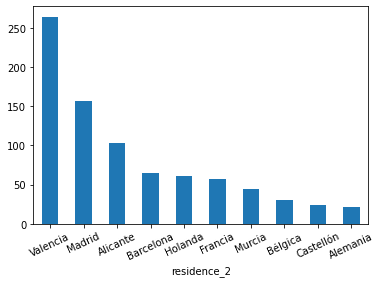

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

top_visitor_places = quiz_df.groupby(['residence_2'])['residence_2'].count().sort_values(ascending = False)
histogram = top_visitor_places[:10].plot(kind='bar')
histogram.tick_params(axis='x', rotation=25)

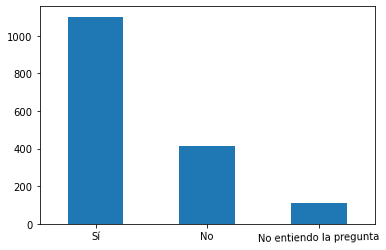

In [49]:
tourist_wifi_enabled = quiz_df[quiz_df['residence_1'] != 'Alcoi']['wifi_enabled'].value_counts()

histogram = tourist_wifi_enabled.plot(kind='bar')
histogram.tick_params(axis='x', rotation = 1)

Ciñéndonos a los turistas que son conscientes de que han activado el wifi, con el sistema implantado se estaría capturando aproximadamente el 47% de los turistas totales que visitan la ciudad.

In [70]:
# quiz_df['date'] = quiz_df['date'].dt.strftime('%Y-%m')
single_tourist_info_visitors = quiz_df.loc[quiz_df.index.repeat(quiz_df.companions_number)]
tourist_info_visitors = single_tourist.groupby(by = ['date'])['residence_1'].count()

date
2021-06     57
2021-07    278
2021-08    515
2021-09    230
2021-10    276
2021-11    253
2021-12    540
2022-01    235
2022-02    213
Name: residence_1, dtype: int64

# Referencias

[CÓMO MEDIR LA POBLACIÓN TURÍSTICA REAL: ALCOY TOURIST LAB](https://www.turismecv.com/2021/11/30/como-medir-la-poblacion-turistica-real-alcoy-tourist-lab/)